In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
IMG_SIZE = 32
NUM_CLASSES = 43

def load_data(data_dir):
    images, labels = [], []
    for label in range(NUM_CLASSES):
        path = os.path.join(data_dir, str(label))
        count = 0
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            count += 1
            if count >= 1100:
                break
            try:
                img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
                img = np.array(img)
                images.append(img)
                labels.append(label)
            except:
                continue
        print(f"Loaded {count} images for label {label}")
    
    return np.array(images), np.array(labels)

def count_images(data_dir):
    count = 0
    dir = {}
    for label in range(NUM_CLASSES):
        path = os.path.join(data_dir, str(label))
        count += len(os.listdir(path))
        dir[label] = len(os.listdir(path))
    return count, dir

class_names = [
    "Speed limit 20", "Speed limit 30", "Speed limit 50", "Speed limit 60",
    "Speed limit 70", "Speed limit 80", "End of speed limit 80", "Speed limit 100",
    "Speed limit 120", "No passing", "No passing for trucks", "Right-of-way at intersection",
    "Priority road", "Yield", "Stop", "No vehicles", "Vehicles over 3.5t prohibited",
    "No entry", "General caution", "Dangerous curve left", "Dangerous curve right",
    "Double curve", "Bumpy road", "Slippery road", "Road narrows on the right",
    "Road work", "Traffic signals", "Pedestrians", "Children crossing",
    "Bicycles crossing", "Beware of ice/snow", "Wild animals crossing",
    "End of all restrictions", "Turn right ahead", "Turn left ahead",
    "Ahead only", "Go straight or right", "Go straight or left", "Keep right",
    "Keep left", "Roundabout", "End of no passing", "End of no passing for trucks"
]

def predict_image(model,img_path):
    img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
    img = np.array(img).astype('float32') / 255.0
    pred = model.predict(np.expand_dims(img, axis=0))
    print(pred[0][np.argmax(pred[0])])
    plt.imshow(img)
    plt.bar(np.arange(NUM_CLASSES),pred[0])
    plt.title('Prediction Distribution')
    return class_names[np.argmax(pred)]


In [ ]:
MODEL_PATH = 'cnn_model_v01.h5'

try:
    model = keras.models.load_model(MODEL_PATH)
except:
    X, y = load_data('archive/Train')
    X = X.astype('float32') / 255.0
    y = to_categorical(y, NUM_CLASSES)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential([
        keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
        Conv2D(10, (3, 3), activation='relu'),
        Dropout(0.2),
        MaxPooling2D(2, 2),
        Conv2D(20, (3, 3), activation='relu'),
        Dropout(0.2),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.2),
        Dense(60, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    model.save('cnn_model_v03.h5')

    history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
0.9999993
Speed limit 30


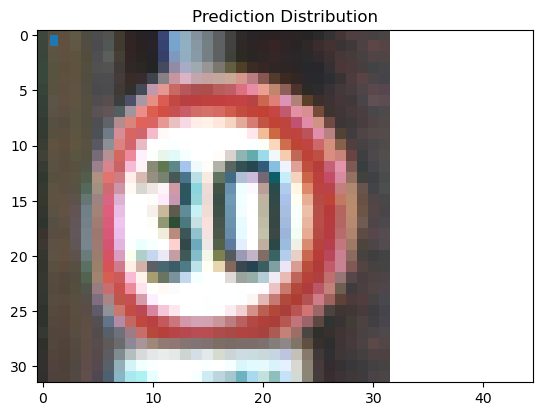

In [27]:
print(predict_image(model,"archive/Test/00001.png"))